## MAJOR PROJECT -  ML042B11

AASTHA VYAS 

Task(T): Predicting the cost of a used car in India.

Experience(E): Data collected from various sources and distributed across various locations in India.

Performance(P): Mean Absolute Error

##### IMPORTING LIBS

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

##### IMPORTING Dataset

In [2]:
df_train = pd.read_excel(r"Data_Train.xlsx")

df_test = pd.read_excel(r"Data_Test.xlsx")

In [3]:
df_train.shape, df_test.shape

((6019, 12), (1234, 11))

### Data Exploration

In [4]:
df_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


### CLEANING DATASET & HANDLING MISSING VALUES

In [6]:
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
df_train.dropna(subset=['Mileage'], how='any',inplace=True)

In [8]:
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
df_train.shape

(6017, 12)

In [10]:
df_train.nunique()

Name                 1874
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1373
dtype: int64

#### MILEAGE

In [11]:
df_train['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [12]:
df_train.Mileage=df_train['Mileage'].str.replace('kmpl','').str.replace('km/kg','')


In [13]:
df_train.Mileage=df_train.Mileage.astype(float)

In [14]:
df_train['Mileage'][df_train.Mileage!=0].mean()

18.342252479408355

In [15]:
df_train['Mileage'][df_train.Mileage==0]=18.3422
df_train.Mileage[df_train.Mileage==18.3422]

14      18.3422
67      18.3422
79      18.3422
194     18.3422
229     18.3422
262     18.3422
307     18.3422
424     18.3422
443     18.3422
544     18.3422
631     18.3422
647     18.3422
707     18.3422
749     18.3422
915     18.3422
962     18.3422
996     18.3422
1059    18.3422
1259    18.3422
1271    18.3422
1308    18.3422
1345    18.3422
1354    18.3422
1385    18.3422
1419    18.3422
1460    18.3422
1764    18.3422
1857    18.3422
2053    18.3422
2096    18.3422
         ...   
3033    18.3422
3044    18.3422
3061    18.3422
3093    18.3422
3189    18.3422
3210    18.3422
3271    18.3422
3516    18.3422
3522    18.3422
3645    18.3422
4152    18.3422
4234    18.3422
4302    18.3422
4412    18.3422
4629    18.3422
4687    18.3422
4704    18.3422
5016    18.3422
5022    18.3422
5119    18.3422
5270    18.3422
5311    18.3422
5374    18.3422
5426    18.3422
5529    18.3422
5647    18.3422
5875    18.3422
5943    18.3422
5972    18.3422
6011    18.3422
Name: Mileage, Length: 6

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6017 non-null object
Location             6017 non-null object
Year                 6017 non-null int64
Kilometers_Driven    6017 non-null int64
Fuel_Type            6017 non-null object
Transmission         6017 non-null object
Owner_Type           6017 non-null object
Mileage              6017 non-null float64
Engine               5981 non-null object
Power                5981 non-null object
Seats                5975 non-null float64
Price                6017 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 611.1+ KB


#### ENGINE 

In [17]:
df_train['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
1497 CC    229
1198 CC    227
1968 CC    216
1995 CC    183
1461 CC    152
2143 CC    149
1582 CC    145
1199 CC    143
1598 CC    141
1396 CC    139
796 CC     129
2494 CC    121
1086 CC    108
1591 CC     94
2993 CC     90
1399 CC     88
2982 CC     86
1798 CC     84
2987 CC     67
2967 CC     61
814 CC      59
1120 CC     54
1196 CC     50
1364 CC     47
1493 CC     47
          ... 
1985 CC      2
3597 CC      2
2997 CC      2
2771 CC      2
1948 CC      1
2925 CC      1
1489 CC      1
2147 CC      1
5204 CC      1
2149 CC      1
1422 CC      1
1797 CC      1
2706 CC      1
5998 CC      1
4951 CC      1
2995 CC      1
1978 CC      1
2773 CC      1
2487 CC      1
970 CC       1
2349 CC      1
1468 CC      1
3197 CC      1
2694 CC      1
2092 CC      1
3200 CC      1
2495 CC      1
2720 CC      1
2112 CC      1
2999 CC      1
Name: Engine, Length: 145, dtype: int64

In [18]:
df_train.Engine.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [19]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mean()

1621.5059354622972

In [20]:
df_train['Engine'].fillna(value = 1621.5059, inplace = True)
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
dtype: int64

#### POWER 

In [21]:
df_train['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
67.1 bhp      107
null bhp      107
67.04 bhp     107
82 bhp        101
88.5 bhp      100
117.3 bhp      93
118 bhp        90
121.3 bhp      88
190 bhp        79
126.2 bhp      78
170 bhp        77
70 bhp         75
88.7 bhp       75
80 bhp         74
86.8 bhp       74
174.33 bhp     71
81.86 bhp      71
103.6 bhp      69
81.83 bhp      68
68 bhp         62
68.05 bhp      61
85.8 bhp       59
184 bhp        58
102 bhp        57
120 bhp        57
             ... 
503 bhp         1
261.5 bhp       1
76.9 bhp        1
127 bhp         1
120.33 bhp      1
181.04 bhp      1
114.4 bhp       1
174.57 bhp      1
550 bhp         1
281.61 bhp      1
367 bhp         1
488.1 bhp       1
271.72 bhp      1
61 bhp          1
237.4 bhp       1
135.1 bhp       1
500 bhp         1
123.37 bhp      1
395 bhp         1
236 bhp         1
89.75 bhp       1
139.07 bhp      1
246.74 bhp      1
192 bhp         1
227 bhp   

In [22]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

In [23]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mean()

113.2722029281571

In [24]:
df_train['Power'].fillna(value = 113.272202, inplace = True)
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [25]:
df_train.Power[df_train['Power']==113.2722]

Series([], Name: Power, dtype: float64)

#### SEATS

In [26]:
df_train['Seats'].value_counts()


5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [27]:
df_train['Seats'].mode()

0    5.0
dtype: float64

In [28]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [29]:
df_train= df_train.astype({'Seats':'object'})

#### BRAND 

In [30]:
df_train['Company'] = df_train['Name'].str.split(' ').str[0]
df_train['Model'] = df_train['Name'].str.split(' ').str[1]
df_train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai,EON
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5,3.50,Nissan,Micra
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,17.50,Toyota,Innova
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5,5.20,Volkswagen,Vento
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5,1.95,Tata,Indica


In [31]:
df_train.drop('Name', axis=1, inplace=True)
df_train.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35,Hyundai,EON
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5,3.50,Nissan,Micra
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,17.50,Toyota,Innova
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5,5.20,Volkswagen,Vento
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5,1.95,Tata,Indica


In [32]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

In [33]:
dataset=df_train.copy()

In [34]:
dataset.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company              0
Model                0
dtype: int64

In [35]:
df_train.dtypes

Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
Price                float64
Company               object
Model                 object
dtype: object

In [36]:
object_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

## Test Data Preprocessing


In [37]:
df_test.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.1+ KB


### Engine column

In [39]:
df_test.Engine.unique()

array(['998 CC', '796 CC', '2393 CC', '1364 CC', '1197 CC', '2179 CC',
       '2982 CC', '814 CC', '1497 CC', '1968 CC', '1794 CC', '1248 CC',
       '1598 CC', '1995 CC', '1399 CC', '1298 CC', '1198 CC', nan,
       '1799 CC', '1299 CC', '1498 CC', '1086 CC', '2835 CC', '1591 CC',
       '2494 CC', '1373 CC', '2143 CC', '2953 CC', '1396 CC', '1798 CC',
       '1199 CC', '1196 CC', '1461 CC', '2487 CC', '1582 CC', '2496 CC',
       '1368 CC', '1596 CC', '1595 CC', '2354 CC', '624 CC', '2993 CC',
       '936 CC', '2987 CC', '1999 CC', '999 CC', '2000 CC', '1493 CC',
       '1120 CC', '3498 CC', '1496 CC', '1405 CC', '1896 CC', '2967 CC',
       '2477 CC', '1948 CC', '1172 CC', '1797 CC', '2498 CC', '1061 CC',
       '1150 CC', '1495 CC', '2499 CC', '1796 CC', '2362 CC', '2523 CC',
       '5998 CC', '2755 CC', '2400 CC', '2349 CC', '995 CC', '1998 CC',
       '2999 CC', '1795 CC', '1984 CC', '793 CC', '1341 CC', '1186 CC',
       '1499 CC', '1991 CC', '799 CC', '1586 CC', '2497 CC', '195

In [40]:
df_test['Engine'] = df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Engine'] = df_test['Engine'].astype(float)
df_test['Engine'].mean()

1593.5849673202615

In [41]:
df_test['Engine'].fillna(value = 1593.5849, inplace = True)
df_test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                10
Seats                11
dtype: int64

### Power

In [42]:
df_test['Power'].unique()

array(['58.2 bhp', '47.3 bhp', '147.8 bhp', 'null bhp', '82.85 bhp',
       '140 bhp', '168.7 bhp', '55.2 bhp', '118 bhp', '167.6 bhp',
       '82 bhp', '125 bhp', '75 bhp', '102.5 bhp', '184 bhp', '68 bhp',
       '81.80 bhp', '85.8 bhp', '73.94 bhp', nan, '132 bhp', '70 bhp',
       '46.3 bhp', '98.6 bhp', '103.52 bhp', '80 bhp', '67.06 bhp',
       '103.6 bhp', '68.05 bhp', '107.2 bhp', '74 bhp', '121.3 bhp',
       '102 bhp', '190 bhp', '174.33 bhp', '88.5 bhp', '91.1 bhp',
       '136 bhp', '100.6 bhp', '89.84 bhp', '153.86 bhp', '174.3 bhp',
       '67.04 bhp', '69 bhp', '78 bhp', '138.1 bhp', '81.83 bhp',
       '88.8 bhp', '67 bhp', '82.5 bhp', '120 bhp', '108.62 bhp',
       '67.1 bhp', '86.8 bhp', '93.7 bhp', '62 bhp', '84 bhp', '79.4 bhp',
       '63.1 bhp', '100 bhp', '81.86 bhp', '175.67 bhp', '87.2 bhp',
       '126.32 bhp', '103.2 bhp', '179.5 bhp', '88.76 bhp', '99.6 bhp',
       '120.7 bhp', '62.1 bhp', '83.1 bhp', '180 bhp', '75.94 bhp',
       '126.24 bhp', '35 bhp',

In [43]:
df_test['Power'] = df_test['Power'].str.split(' ').str[0]
df_test.Power[df_test.Power == 'null'] = np.NaN
df_test['Power'].isnull().sum()

32

In [44]:
df_test['Power'] = df_test['Power'].astype(float)
df_test['Power'].mean()

110.38042013311168

In [45]:
df_test['Power'].fillna(value = 110.3804, inplace = True)
df_test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                11
dtype: int64

### Seats

In [46]:
df_test['Seats'].value_counts()


5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [47]:
df_test["Seats"].fillna(value = 5.0, inplace=True)

df_test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

### Brand names

In [48]:
df_test['Company'] = df_test['Name'].str.split(' ').str[0]
df_test['Model'] = df_test['Name'].str.split(' ').str[1]
df_test.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.2000,4.0,Maruti,Alto
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.3000,5.0,Maruti,Alto
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.8000,7.0,Toyota,Innova
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,110.3804,5.0,Toyota,Etios
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.8500,5.0,Hyundai,i20
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179.0,140.0000,7.0,Mahindra,XUV500
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982.0,168.7000,7.0,Toyota,Fortuner
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814.0,55.2000,5.0,Hyundai,EON
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497.0,118.0000,5.0,Honda,City
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179.0,140.0000,7.0,Mahindra,XUV500


In [49]:
df_test.drop('Name', axis=1, inplace=True)
df_test.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.2000,4.0,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.3000,5.0,Maruti,Alto
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.8000,7.0,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,110.3804,5.0,Toyota,Etios
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.8500,5.0,Hyundai,i20
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179.0,140.0000,7.0,Mahindra,XUV500
6,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982.0,168.7000,7.0,Toyota,Fortuner
7,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814.0,55.2000,5.0,Hyundai,EON
8,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497.0,118.0000,5.0,Honda,City
9,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179.0,140.0000,7.0,Mahindra,XUV500


In [50]:
df_test['Year'] = df_test['Year'].astype(float)
df_test['Kilometers_Driven'] = df_test['Kilometers_Driven'].astype(float)

In [51]:
df_test.Mileage=df_test['Mileage'].str.replace('kmpl','').str.replace('km/kg','')
df_test.Mileage=df_test.Mileage.astype(float)
dataset_test=df_test.copy()
dataset_test.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Company              0
Model                0
dtype: int64

In [52]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Location             1234 non-null object
Year                 1234 non-null float64
Kilometers_Driven    1234 non-null float64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1234 non-null float64
Seats                1234 non-null float64
Company              1234 non-null object
Model                1234 non-null object
dtypes: float64(6), object(6)
memory usage: 115.8+ KB


## UNIVARIATE ANALYSIS

### Finding relations

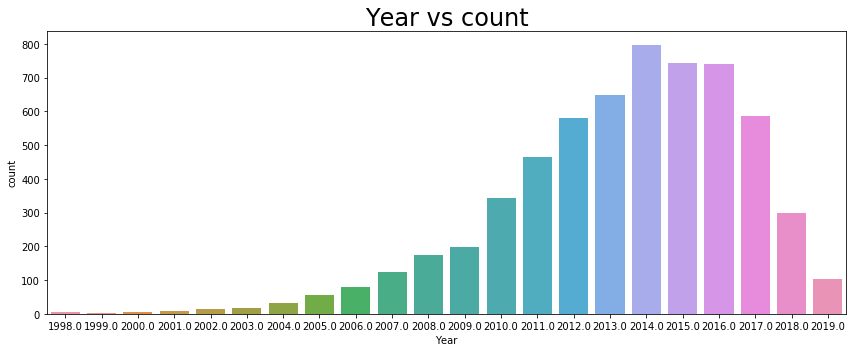

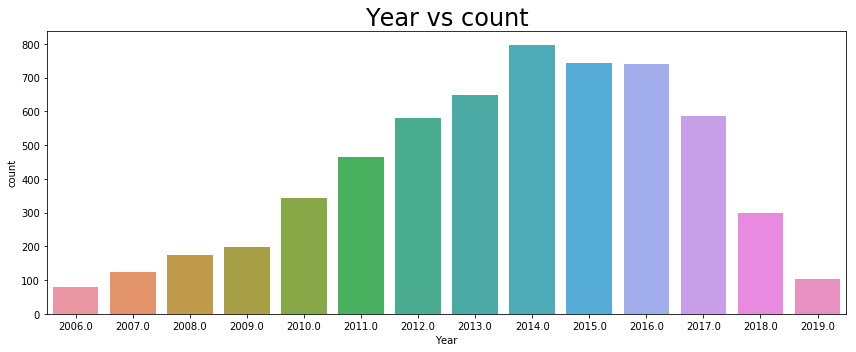

In [53]:
plt.figure(figsize = (12,5))
sns.countplot(dataset['Year'])
plt.title('Year vs count', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
sns.countplot(dataset['Year'].loc[dataset['Year']>2005.0])
plt.title('Year vs count', size = 24)
plt.tight_layout()
plt.show()

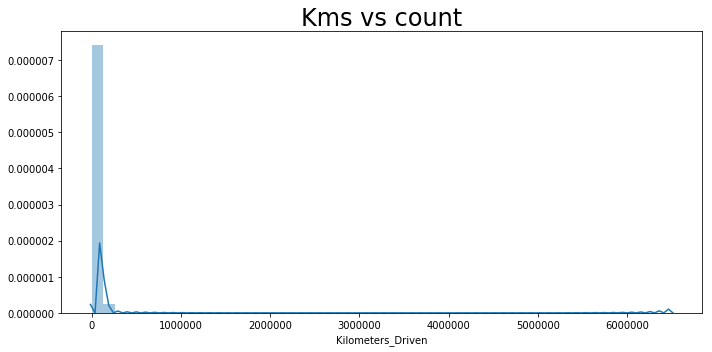

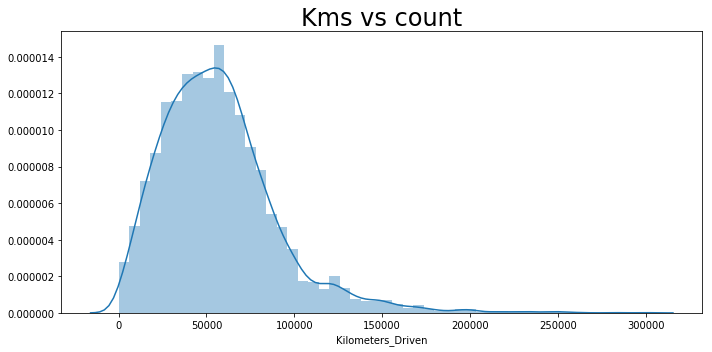

In [54]:
plt.figure(figsize = (10,5))
sns.distplot(dataset['Kilometers_Driven'])
plt.title('Kms vs count', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,5))
sns.distplot(dataset['Kilometers_Driven'].loc[dataset['Kilometers_Driven']<300000])
plt.title('Kms vs count', size = 24)
plt.tight_layout()
plt.show()

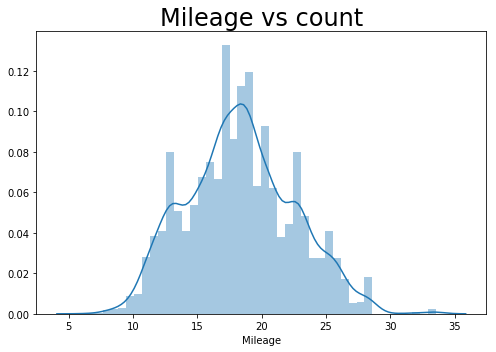

In [55]:
plt.figure(figsize = (7,5))
sns.distplot(dataset['Mileage'])
plt.title('Mileage vs count', size = 24)
plt.tight_layout()
plt.show()

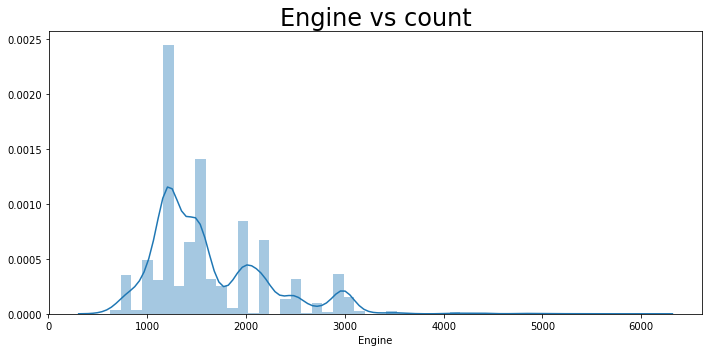

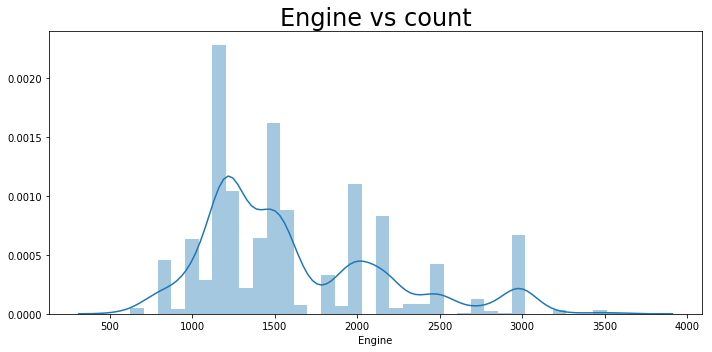

In [56]:
plt.figure(figsize = (10,5))
sns.distplot(dataset['Engine'])
plt.title('Engine vs count', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,5))
sns.distplot(dataset['Engine'].loc[dataset['Engine']<4000])
plt.title('Engine vs count', size = 24)
plt.tight_layout()
plt.show()

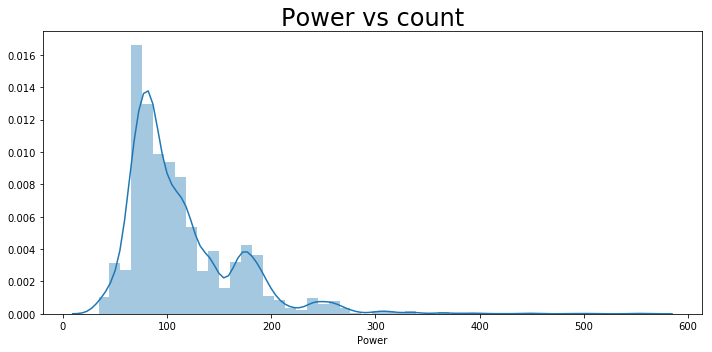

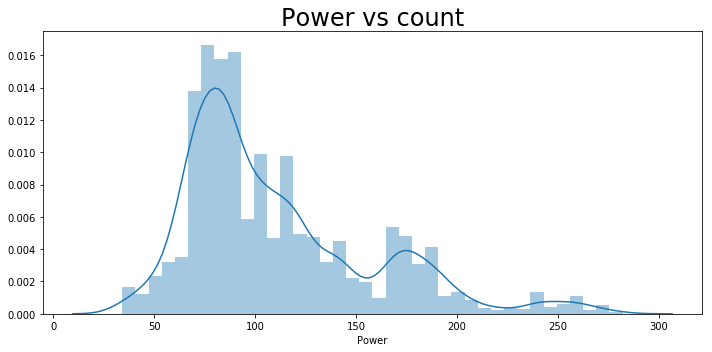

In [57]:
plt.figure(figsize = (10,5))
sns.distplot(dataset['Power'])
plt.title('Power vs count', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,5))
sns.distplot(dataset['Power'].loc[dataset['Power']<300])
plt.title('Power vs count', size = 24)
plt.tight_layout()
plt.show()

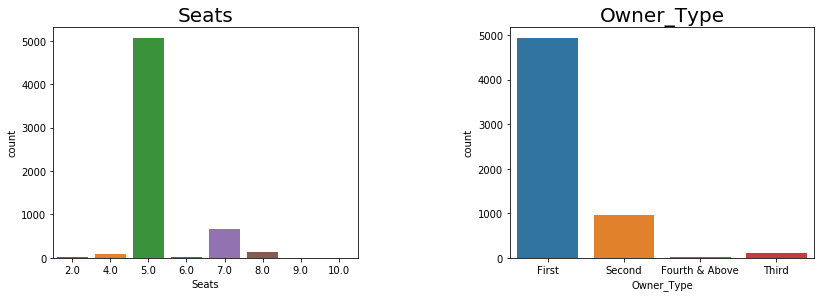

In [58]:
plt.figure(figsize=(30,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt.title('Seats', fontsize=20)
sns.countplot(dataset['Seats'])

plt.subplot(142)
plt.title('Owner_Type', fontsize=20)
sns.countplot(dataset['Owner_Type'])

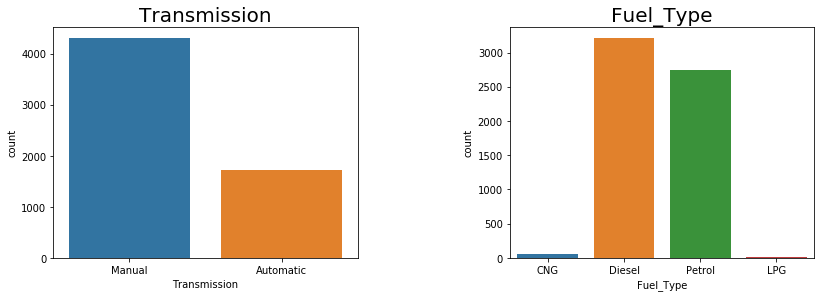

In [59]:
plt.figure(figsize=(30,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt.title('Transmission', fontsize=20)
sns.countplot(dataset['Transmission'])

plt.subplot(142)
plt.title('Fuel_Type', fontsize=20)
sns.countplot(dataset['Fuel_Type'])

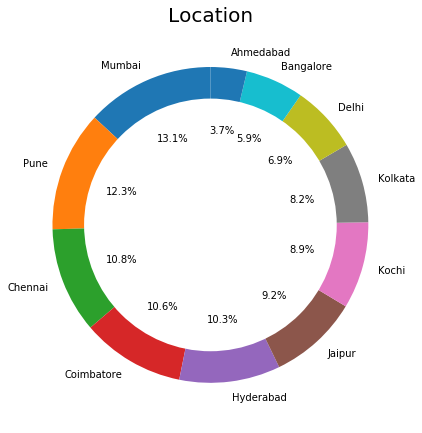

In [60]:
plt.figure(figsize = (6,6))
plt.pie(dataset['Location'].value_counts(), startangle = 90, autopct = '%1.1f%%', 
        labels = dataset['Location'].unique())
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title('Location', fontsize=20)
plt.show()

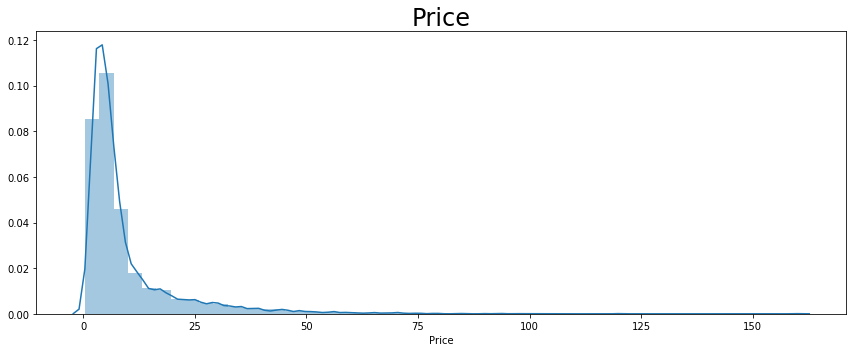

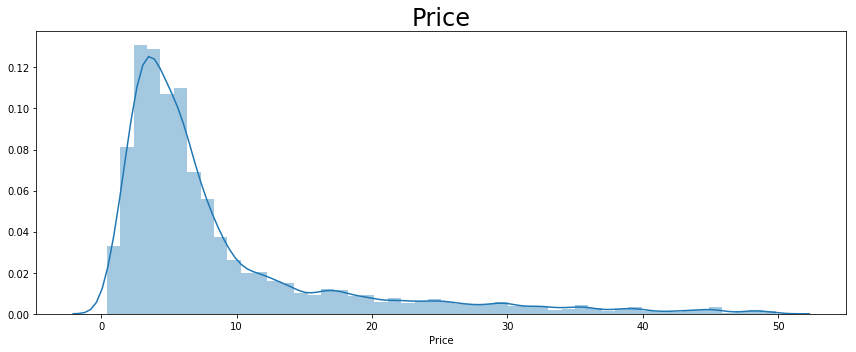

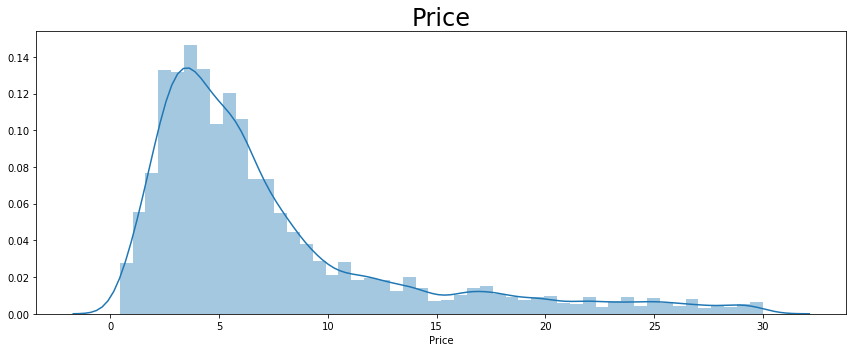

In [61]:
plt.figure(figsize = (12,5))
sns.distplot(dataset['Price'])
plt.title('Price', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
sns.distplot(dataset['Price'].loc[dataset['Price']<50])
plt.title('Price', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
sns.distplot(dataset['Price'].loc[dataset['Price']<30])
plt.title('Price', size = 24)
plt.tight_layout()
plt.show()

In [62]:
dataset.describe(include='all')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
count,6017,6017.000000,6.017000e+03,6017,6017,6017,6017.000000,6017.000000,6017.000000,6017.0,6017.000000,6017,6017
unique,11,NaN,NaN,4,2,4,NaN,NaN,NaN,8.0,NaN,31,210
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN,Maruti,Swift
freq,789,NaN,NaN,3205,4299,4927,NaN,NaN,NaN,5055.0,NaN,1211,353
mean,NaN,2013.358152,5.874228e+04,NaN,NaN,NaN,18.342252,1621.505935,113.272203,NaN,9.478340,NaN,NaN
std,NaN,3.269967,9.128375e+04,NaN,NaN,NaN,4.151810,599.316375,53.229183,NaN,11.189605,NaN,NaN
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,6.400000,624.000000,34.200000,NaN,0.440000,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.400000,1198.000000,78.000000,NaN,3.500000,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.342200,1493.000000,98.600000,NaN,5.640000,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,NaN,9.950000,NaN,NaN


In [63]:
print(df_train['Price'].median()) 

5.64


In [64]:
 df_train['Price'] = np.where(df_train['Price'] >35,5.64 , df_train['Price'])

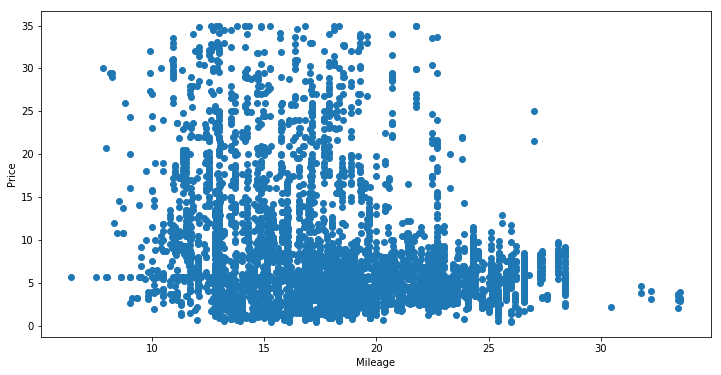

18.3422
25.47


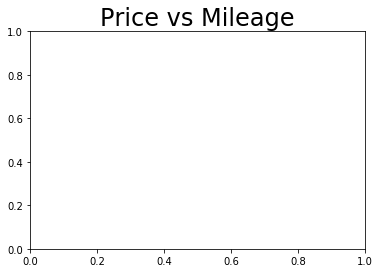

In [65]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Mileage'], df_train['Price'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show()
plt.title('Price vs Mileage', size = 24)
print(df_train['Mileage'].median()) 
print(df_train['Mileage'].quantile(0.95))

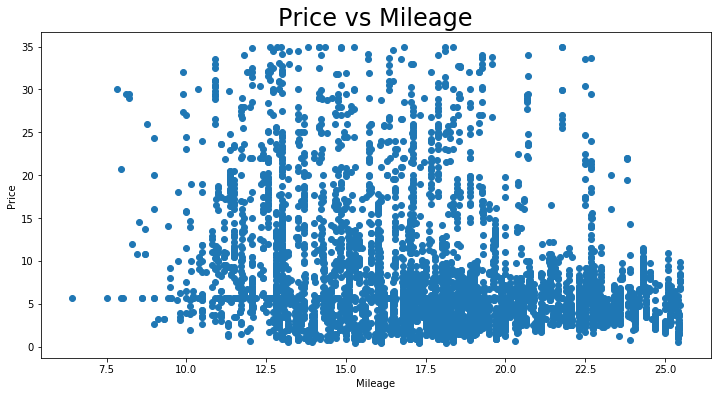

In [66]:
 df_train['Mileage'] = np.where(df_train['Mileage'] > 25.47, 18.15, df_train['Mileage'])

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Mileage'], df_train['Price'])
ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.title('Price vs Mileage', size = 24)
plt.show()

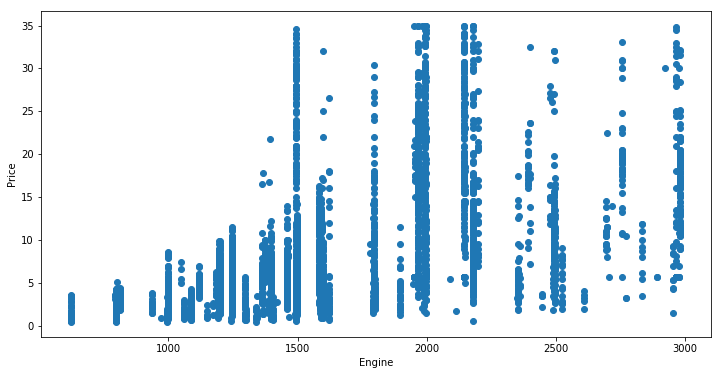

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Engine'], df_train['Price'])
ax.set_xlabel('Engine')
ax.set_ylabel('Price')
plt.show()

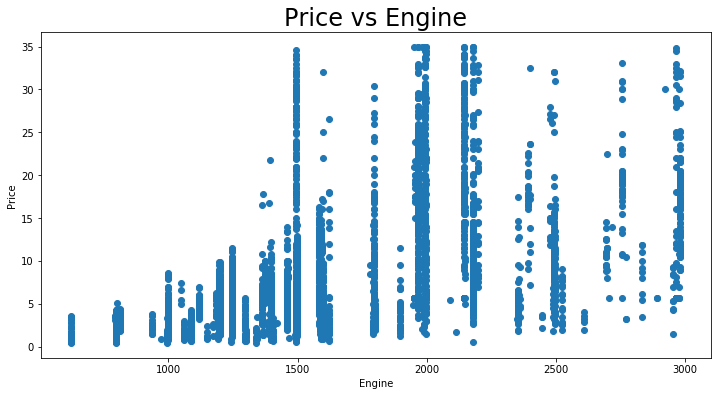

In [68]:
 df_train['Engine'] = np.where(df_train['Engine'] > 2982.0, 1493.0, df_train['Engine'])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Engine'], df_train['Price'])
plt.title('Price vs Engine', size = 24)
ax.set_xlabel('Engine')
ax.set_ylabel('Price')
plt.show()

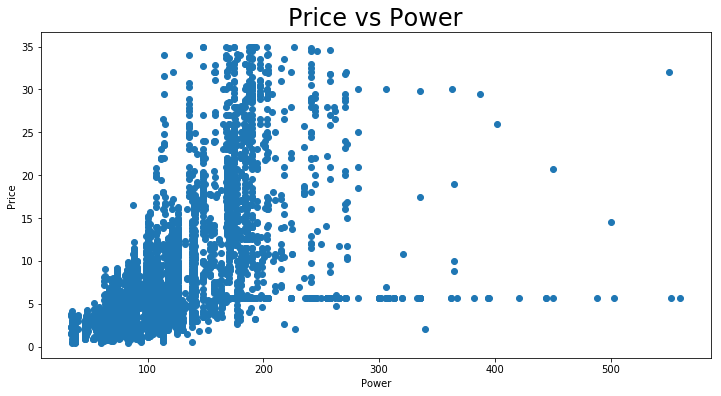

98.6
204.0


In [69]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Power'], df_train['Price'])
ax.set_xlabel('Power')
ax.set_ylabel('Price')
plt.title('Price vs Power', size = 24)
plt.show()

print(df_train['Power'].median()) 
print(df_train['Power'].quantile(0.95))

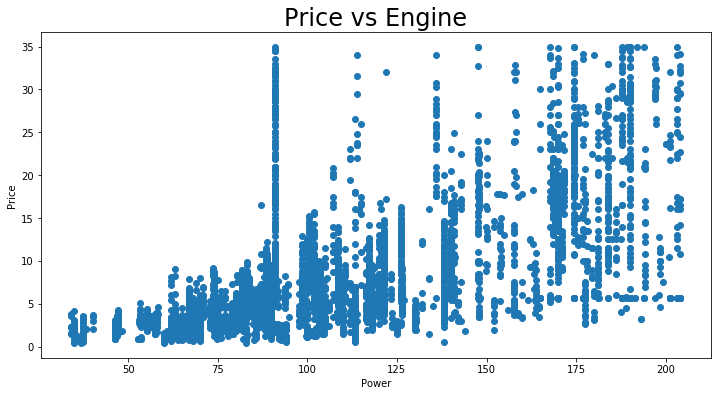

In [70]:
 df_train['Power'] = np.where(df_train['Power'] > 204.0, 91.1, df_train['Power'])
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Power'], df_train['Price'])
ax.set_xlabel('Power')
ax.set_ylabel('Price')
plt.title('Price vs Engine', size = 24)
plt.show()


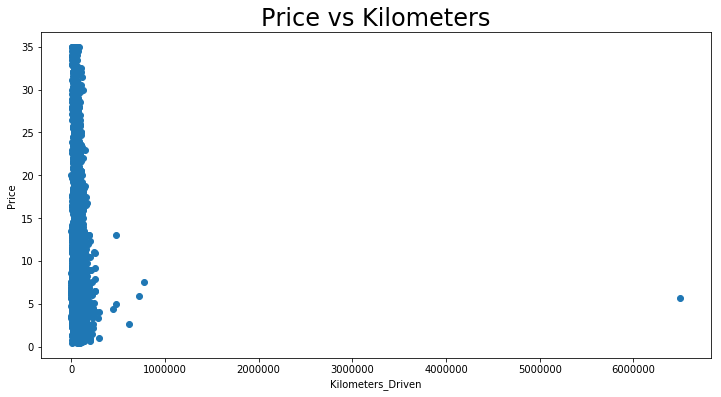

53000.0
120000.0


In [71]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Kilometers_Driven'], df_train['Price'])
ax.set_xlabel('Kilometers_Driven')
ax.set_ylabel('Price')
plt.title('Price vs Kilometers', size = 24)
plt.show()

print(df_train['Kilometers_Driven'].median()) 
print(df_train['Kilometers_Driven'].quantile(0.95))

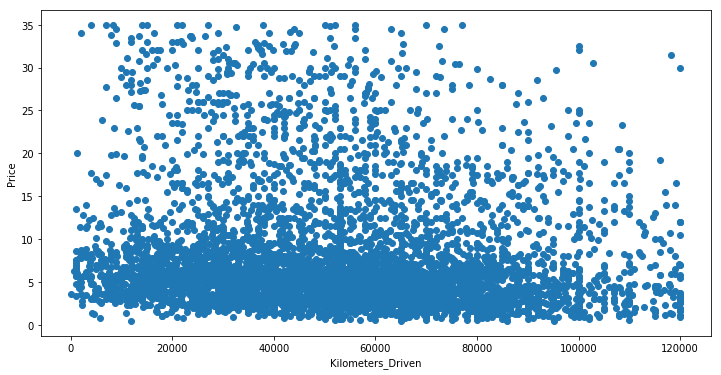

In [72]:
 df_train['Kilometers_Driven'] = np.where(df_train['Kilometers_Driven'] > 120000, 53000, df_train['Kilometers_Driven'])
    
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_train['Kilometers_Driven'], df_train['Price'])
ax.set_xlabel('Kilometers_Driven')
ax.set_ylabel('Price')
plt.show()

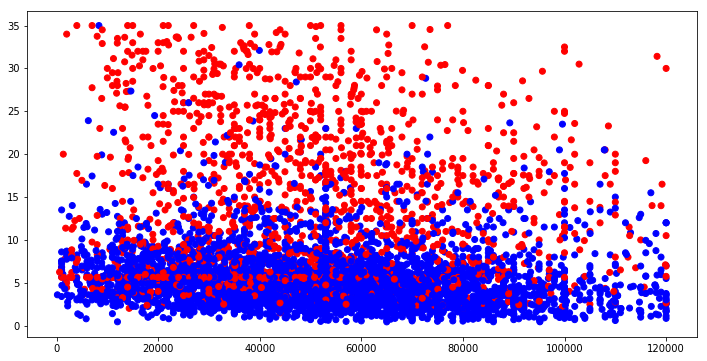

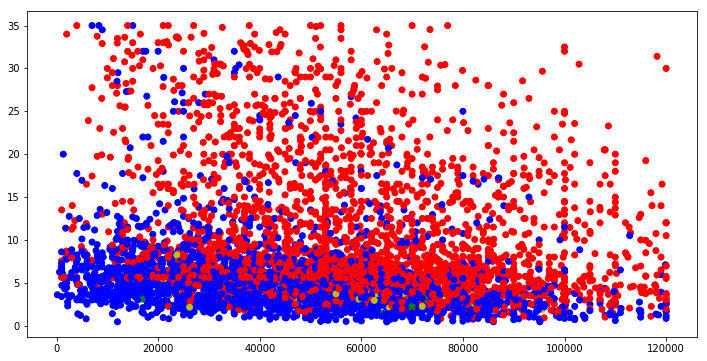

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
colors = {'Automatic':'red', 'Manual':'blue'}
ax.scatter(df_train['Kilometers_Driven'],df_train['Price'], c=df_train['Transmission'].apply(lambda x: colors[x]))
plt.show()


fig, ax = plt.subplots(figsize=(12,6))
colors = {'Diesel':'red', 'Petrol':'blue','CNG':'y','Electric':'black','LPG':'g'}
ax.scatter(df_train['Kilometers_Driven'],df_train['Price'], c=df_train['Fuel_Type'].apply(lambda x: colors[x]))
plt.show()


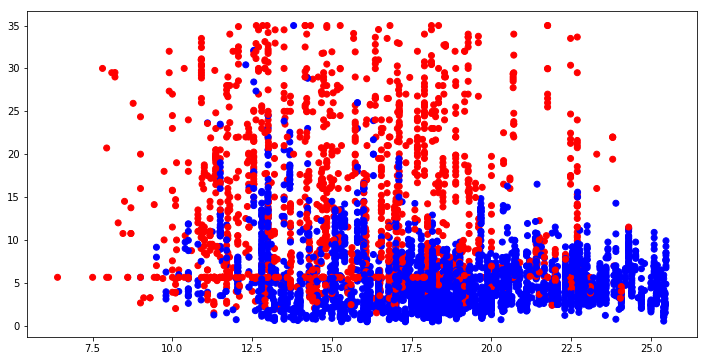

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
colors = {'Automatic':'red', 'Manual':'blue'}
ax.scatter(df_train['Mileage'],df_train['Price'], c=df_train['Transmission'].apply(lambda x: colors[x]))
plt.show()

In [75]:
df_train.dtypes

Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
Price                float64
Company               object
Model                 object
dtype: object

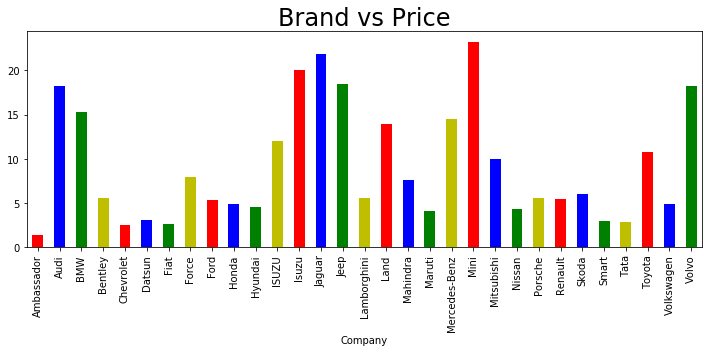

In [76]:
plt.figure(figsize = (10,5))
df_train.groupby(['Company']).Price.median().plot(kind='bar',color={'g','b','y','r'} )
plt.title('Brand vs Price', size = 24)
plt.tight_layout()
plt.show()


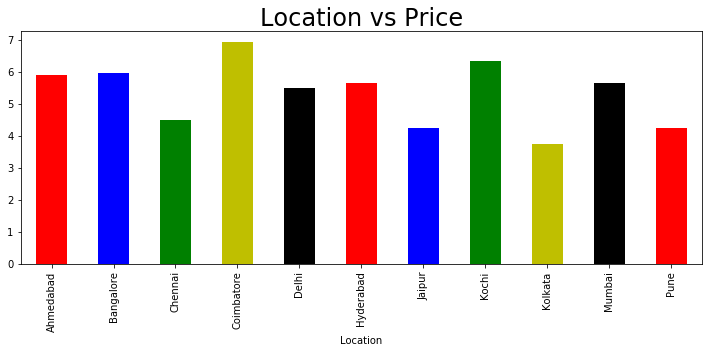

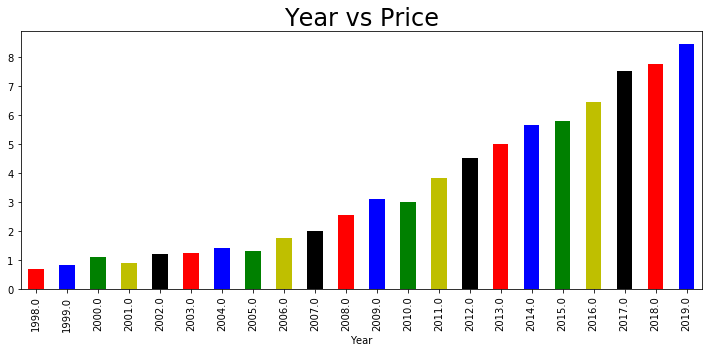

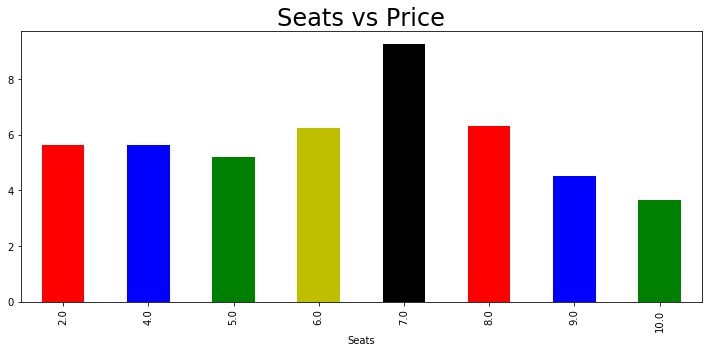

In [77]:
plt.figure(figsize = (10,5))
df_train.groupby(['Location']).Price.median().plot(kind='bar',color={'g','b','y','r','black'} )
plt.title('Location vs Price', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,5))
df_train.groupby(['Year']).Price.median().plot(kind='bar',color={'g','b','y','r','black'} )
plt.title('Year vs Price', size = 24)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,5))
df_train.groupby(['Seats']).Price.median().plot(kind='bar',color={'g','b','y','r','black'} )
plt.title('Seats vs Price', size = 24)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Owner_Type vs Price')

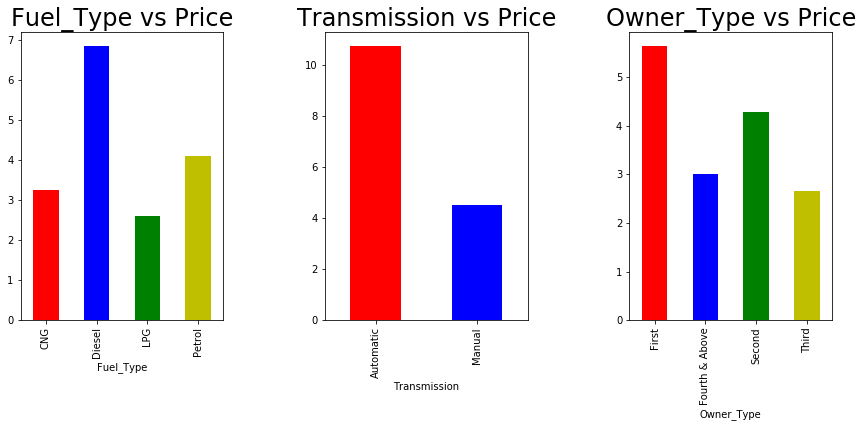

In [78]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
df_train.groupby(['Fuel_Type']).Price.median().plot(kind='bar',color={'g','b','y','r'} )
plt.title('Fuel_Type vs Price', size = 24)

plt.subplot(142)
df_train.groupby(['Transmission']).Price.median().plot(kind='bar',color={'g','b','y','r'} )
plt.title('Transmission vs Price', size = 24)

plt.subplot(143)
df_train.groupby(['Owner_Type']).Price.median().plot(kind='bar',color={'g','b','y','r'} )
plt.title('Owner_Type vs Price', size = 24)

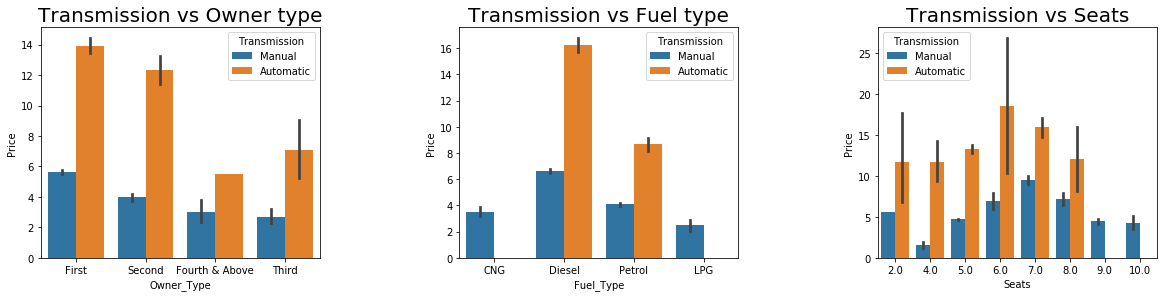

In [79]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(131)
plt.title('Transmission vs Owner type', fontsize=20)
sns.barplot(x="Owner_Type", y="Price", hue="Transmission", data=df_train)

plt.subplot(132)
plt.title('Transmission vs Fuel type', fontsize=20)
sns.barplot(x="Fuel_Type", y="Price", hue="Transmission", data=df_train)

plt.subplot(133)
plt.title('Transmission vs Seats', fontsize=20)
sns.barplot(x="Seats", y="Price", hue="Transmission", data=df_train)

In [80]:
df_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,2013.358152,52334.656806,17.910472,1555.140637,104.757737,7.663567
std,3.269967,24933.294953,3.636197,493.325829,38.187654,6.728478
min,1998.000000,171.000000,6.400000,624.000000,34.200000,0.440000
25%,2011.000000,34000.000000,15.400000,1198.000000,78.000000,3.500000
50%,2014.000000,53000.000000,18.150000,1493.000000,91.100000,5.640000
75%,2016.000000,68525.000000,20.360000,1956.000000,121.400000,8.650000
max,2019.000000,120000.000000,25.470000,2982.000000,204.000000,35.000000


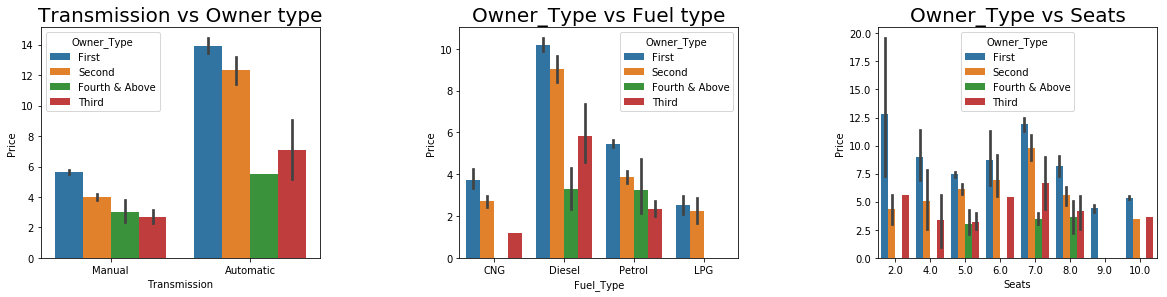

In [81]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(131)
plt.title('Transmission vs Owner type', fontsize=20)
sns.barplot(x="Transmission", y="Price", hue="Owner_Type", data=df_train)

plt.subplot(132)
plt.title('Owner_Type vs Fuel type', fontsize=20)
sns.barplot(x="Fuel_Type", y="Price", hue="Owner_Type", data=df_train)

plt.subplot(133)
plt.title('Owner_Type vs Seats', fontsize=20)
sns.barplot(x="Seats", y="Price", hue="Owner_Type", data=df_train)

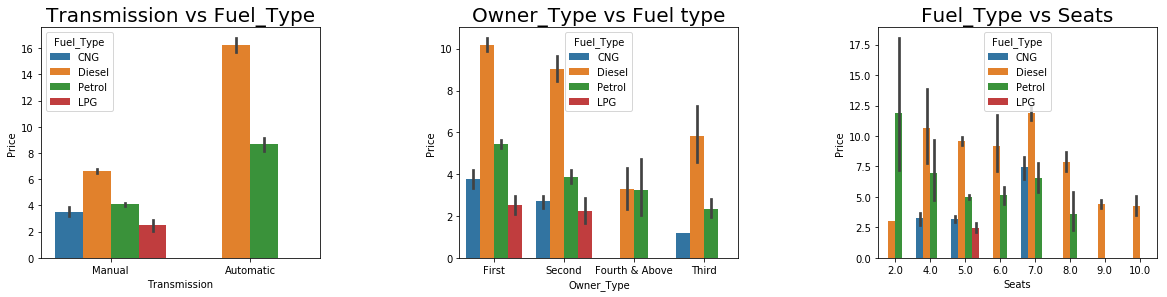

In [82]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(131)
plt.title('Transmission vs Fuel_Type', fontsize=20)
sns.barplot(x="Transmission", y="Price", hue="Fuel_Type", data=df_train)

plt.subplot(132)
plt.title('Owner_Type vs Fuel type', fontsize=20)
sns.barplot(x="Owner_Type", y="Price", hue="Fuel_Type", data=df_train)

plt.subplot(133)
plt.title('Fuel_Type vs Seats', fontsize=20)
sns.barplot(x="Seats", y="Price", hue="Fuel_Type", data=df_train)

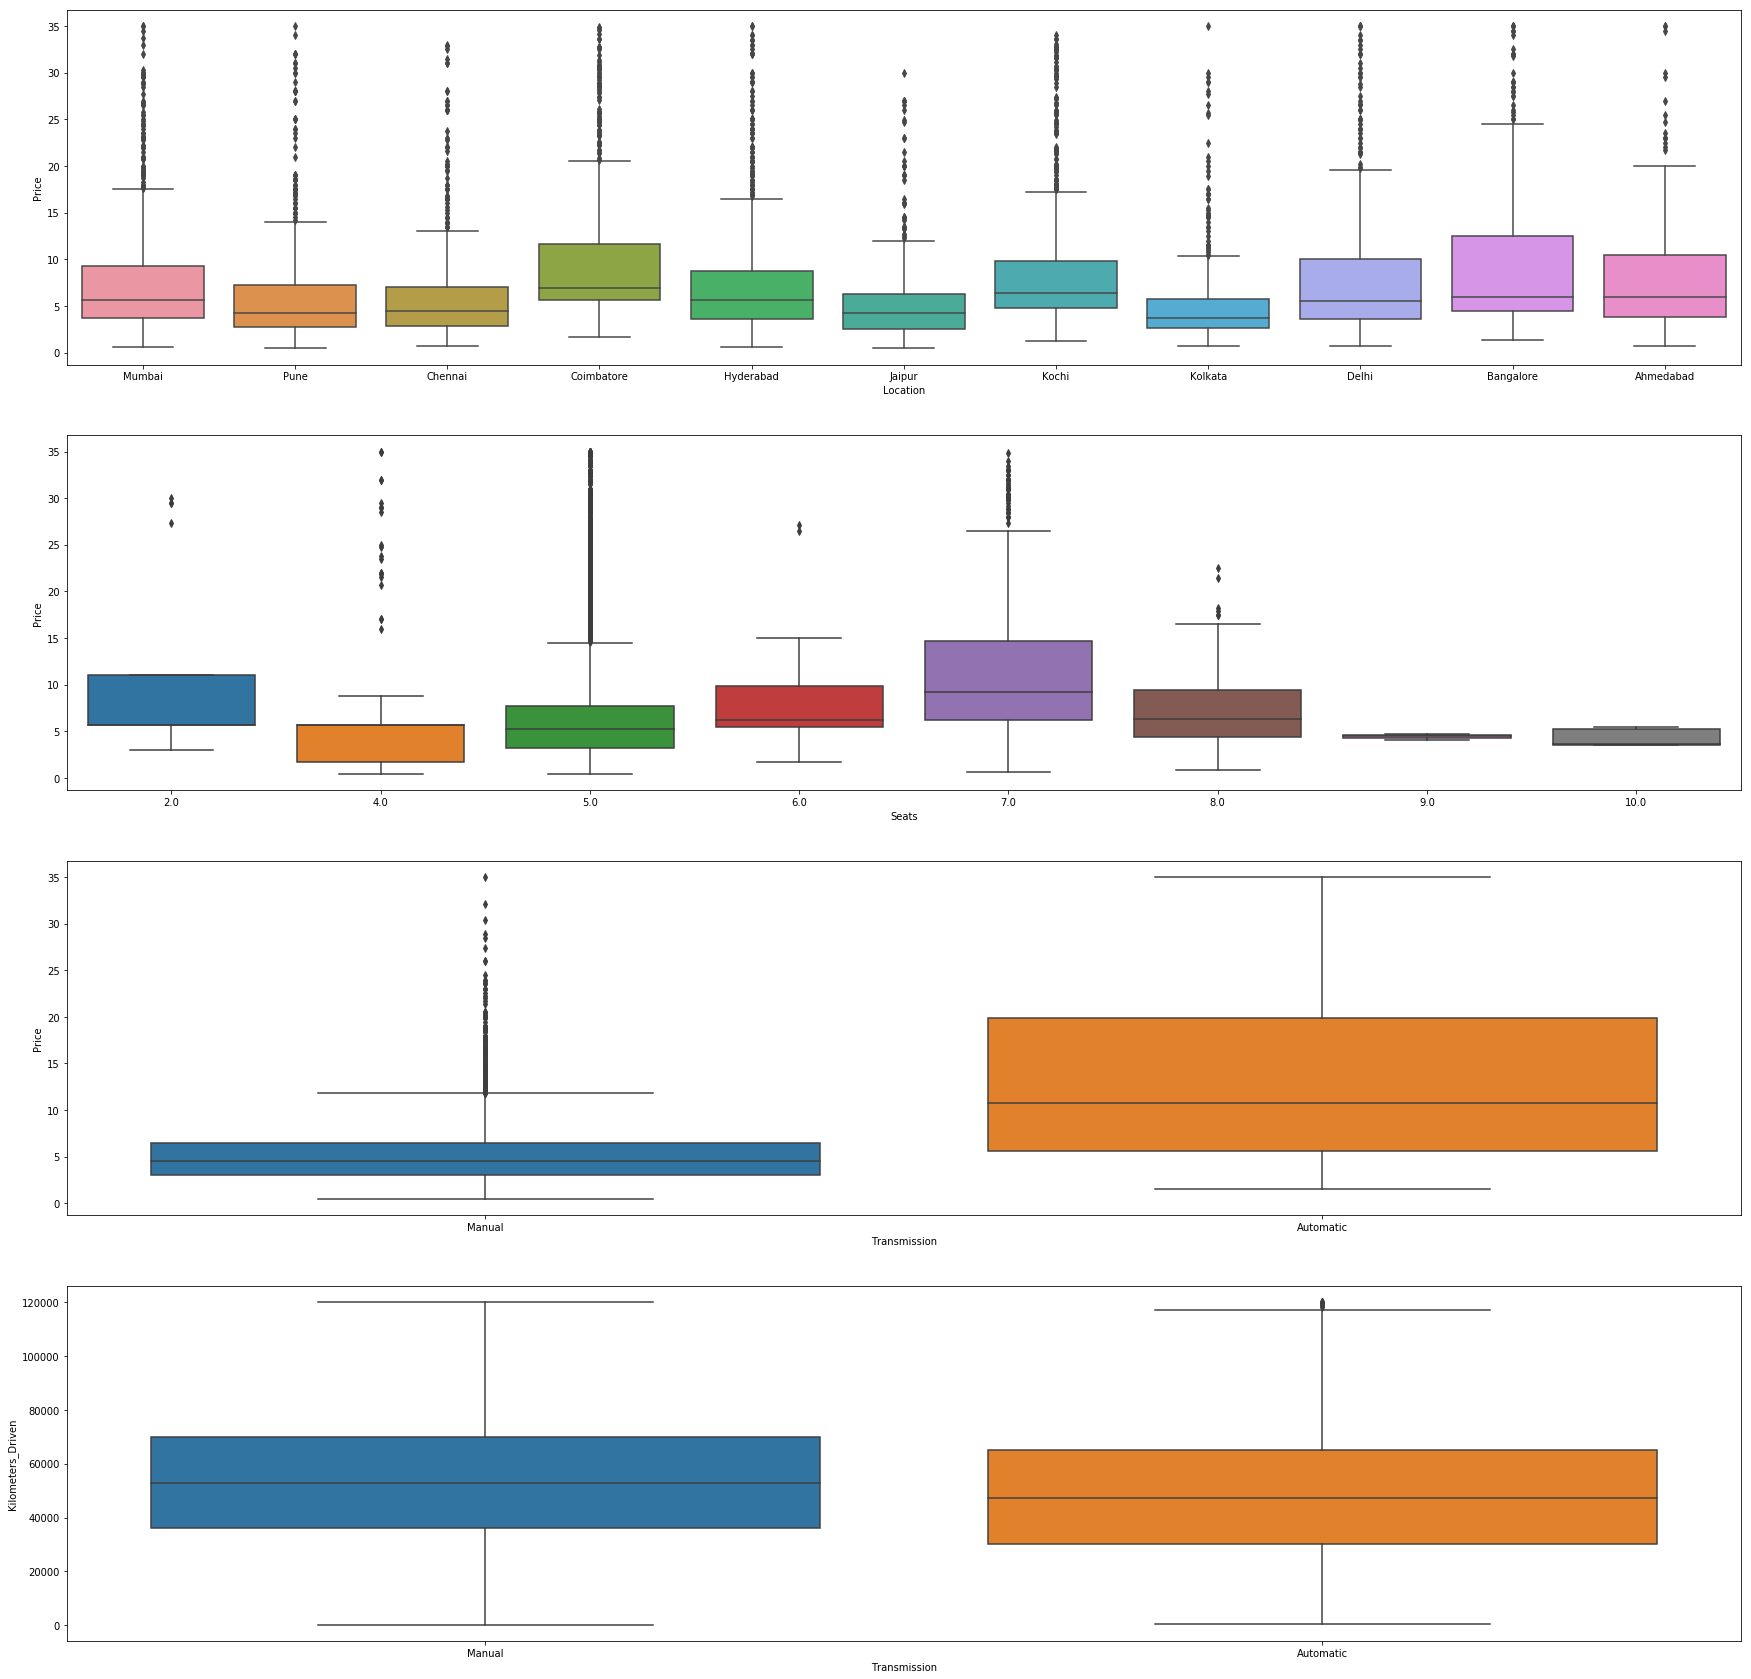

In [83]:
h, axes = plt.subplots (4,1, figsize=(30,30))

sns.boxplot(x='Location',y='Price',data=df_train,ax=axes[0])
sns.boxplot(y='Price',x='Seats',data=df_train,ax=axes[1])
sns.boxplot(y='Price',x='Transmission',data=df_train,ax=axes[2])
sns.boxplot(y='Kilometers_Driven',x='Transmission',data=df_train,ax=axes[3])

## Removing some abnormal Data according to the  box plot 

In [84]:
df =df_train[(df_train.Price<=25) & (df_train.Kilometers_Driven<=118000)]
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010.0,72000.0,CNG,Manual,First,18.1500,998.0,58.16,5,1.75,Maruti,Wagon
1,Pune,2015.0,41000.0,Diesel,Manual,First,19.6700,1582.0,126.20,5,12.50,Hyundai,Creta
2,Chennai,2011.0,46000.0,Petrol,Manual,First,18.2000,1199.0,88.70,5,4.50,Honda,Jazz
3,Chennai,2012.0,87000.0,Diesel,Manual,First,20.7700,1248.0,88.76,7,6.00,Maruti,Ertiga
4,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.2000,1968.0,140.80,5,17.74,Audi,A4
5,Hyderabad,2012.0,75000.0,LPG,Manual,First,21.1000,814.0,55.20,5,2.35,Hyundai,EON
6,Jaipur,2013.0,86999.0,Diesel,Manual,First,23.0800,1461.0,63.10,5,3.50,Nissan,Micra
7,Mumbai,2016.0,36000.0,Diesel,Automatic,First,11.3600,2755.0,171.50,8,17.50,Toyota,Innova
8,Pune,2013.0,64430.0,Diesel,Manual,First,20.5400,1598.0,103.60,5,5.20,Volkswagen,Vento
9,Chennai,2012.0,65932.0,Diesel,Manual,Second,22.3000,1248.0,74.00,5,1.95,Tata,Indica


## PRICE PREDICTION

In [85]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Company = le.fit_transform(df.Company)
df.Model = le.fit_transform(df.Model)
df.Location = le.fit_transform(df.Location)
df.Fuel_Type = le.fit_transform(df.Fuel_Type)
df.Owner_Type = le.fit_transform(df.Owner_Type)
df.Transmission = le.fit_transform(df.Transmission)

df_test.Company = le.fit_transform(df_test.Company)
df_test.Model = le.fit_transform(df_test.Model)
df_test.Location = le.fit_transform(df_test.Location)
df_test.Fuel_Type = le.fit_transform(df_test.Fuel_Type)
df_test.Owner_Type = le.fit_transform(df_test.Owner_Type)
df_test.Transmission = le.fit_transform(df_test.Transmission)



In [87]:
X = df.drop(columns = ['Price'], axis = 1)
y = df["Price"].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [89]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

X=sc.fit_transform(X)
df_test=sc.fit_transform(df_test)

## Linear Regression

In [90]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
y1_pred = regressor.predict(X_test)

In [92]:
cp = pd.DataFrame({'Actual': y_test, 'Predicted': y1_pred})
cp1 = cp.head(40)

In [94]:
print('LR')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

LR
Mean Absolute Error: 2.0543998059417032
Mean Squared Error: 10.086026335451379
Root Mean Squared Error: 3.175850490097319


## Random Forest Tree Regression

In [122]:
from sklearn.ensemble import RandomForestRegressor

regressor_2 = RandomForestRegressor(random_state = 0)
regressor_2.fit(X_train, y_train)
y_pred2 = regressor_2.predict(X_test)


In [117]:
rp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
rp1 = rp.head(40)


In [118]:
print('RandomForests')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

RandomForests
Mean Absolute Error: 1.0257160413030832
Mean Squared Error: 3.1051685661055366
Root Mean Squared Error: 1.7621488490208586


In [119]:
regressor_2.score(X_test,y_test)

0.875654827378915

## Decision Tree Algorithm

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
regressor_3 = DecisionTreeRegressor(random_state = 0)
regressor_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [120]:
y_pred_3 = regressor_3.predict(X_test)

In [101]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Mean Absolute Error: 1.427133507853403
Mean Squared Error: 8.076341819371727
Root Mean Squared Error: 2.841890536134657


In [121]:
regressor_3.score(X_test, y_test)

0.6765862798436775

## Since the data is been more accurately predicted by Random forest we can use it for test data

### Predicting test data

In [102]:
rdm = RandomForestRegressor( n_estimators=160,random_state=0)
rdm.fit(X,y )
fpred = rdm.predict(df_test)

In [105]:
fp = pd.DataFrame({ 'Final_Prediction': fpred})
fp.head(5)

,Final_Prediction
0,2.839375
1,3.225500
2,11.940708
3,3.867750
4,4.567812


In [107]:
dataset_test['Price']=fp.values
dataset_test.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model,Price
0,Delhi,2014.0,40929.0,CNG,Manual,First,32.26,998.0,58.2000,4.0,Maruti,Alto,2.839375
1,Coimbatore,2013.0,54493.0,Petrol,Manual,Second,24.70,796.0,47.3000,5.0,Maruti,Alto,3.225500
2,Mumbai,2017.0,34000.0,Diesel,Manual,First,13.68,2393.0,147.8000,7.0,Toyota,Innova,11.940708
3,Hyderabad,2012.0,139000.0,Diesel,Manual,First,23.59,1364.0,110.3804,5.0,Toyota,Etios,3.867750
4,Mumbai,2014.0,29000.0,Petrol,Manual,First,18.50,1197.0,82.8500,5.0,Hyundai,i20,4.567812
5,Coimbatore,2016.0,85609.0,Diesel,Manual,Second,16.00,2179.0,140.0000,7.0,Mahindra,XUV500,9.379937
6,Pune,2015.0,59000.0,Diesel,Automatic,First,12.55,2982.0,168.7000,7.0,Toyota,Fortuner,15.881313
7,Jaipur,2013.0,65000.0,Petrol,Manual,First,21.10,814.0,55.2000,5.0,Hyundai,EON,2.785500
8,Mumbai,2011.0,66000.0,Petrol,Manual,Second,17.00,1497.0,118.0000,5.0,Honda,City,3.088563
9,Coimbatore,2015.0,54684.0,Diesel,Manual,First,15.10,2179.0,140.0000,7.0,Mahindra,XUV500,7.949312
